In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
file_k = r'C:\Users\janousu\OneDrive - Oulun yliopisto\CROCUS\MYDATA\OBS\KENTTAROVA\obs_KENTTAROVA_hourly.csv'
file_l = r'C:\Users\janousu\OneDrive - Oulun yliopisto\CROCUS\MYDATA\OBS\LOMPOLO\obs_LOMPOLO_hourly.csv'

In [11]:
obs_k = pd.read_csv(file_k, sep=';', index_col=0, parse_dates=True)
obs_k = obs_k[['LE', 'LE_flag', 'SWE_obs']]
obs_k.index.name = 'time'

obs_l = pd.read_csv(file_l, sep=';', index_col=0, parse_dates=True)
obs_l = obs_l[['LE', 'LE_flag', 'SWE_obs']]
obs_l.index.name = 'time'

In [12]:
L = 2500000

In [13]:
obs_k['ET'] = -1*obs_k['LE']/L*60*60 # mm H2O per hour 
obs_l['ET'] = -1*obs_l['LE']/L*60*60 # mm H2O per hour
#obs_k.loc[obs_k['ET'] < -1, 'ET'] = np.nan
#obs_l.loc[obs_l['ET'] < -1, 'ET'] = np.nan
#obs_k.loc[obs_k['ET'] < 0, 'ET'] = 0
#obs_l.loc[obs_l['ET'] < 0, 'ET'] = 0

In [14]:
obs = pd.DataFrame() # both to hourly
obs['ET_NFOR'] = obs_k['ET'].resample('D').sum(min_count=22)
obs['ET_NWET'] = obs_l['ET'].resample('D').sum(min_count=22)
obs['ET_NFOR_flag'] = obs_k['LE_flag'].resample('D').mean()
obs['ET_NWET_flag'] = obs_l['LE_flag'].resample('D').mean()

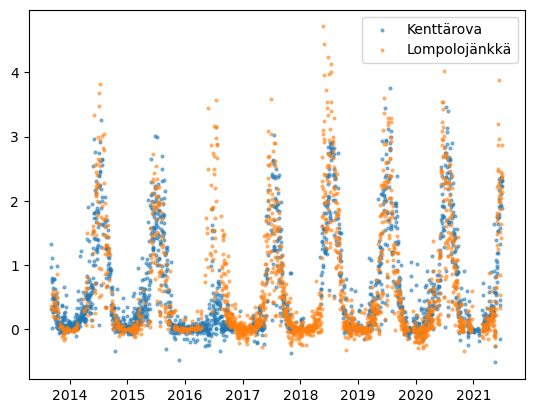

In [15]:
plt.scatter(obs.loc[obs['ET_NFOR_flag'] < 2].index, obs.loc[obs['ET_NFOR_flag'] < 2, 'ET_NFOR'], s=4, alpha=0.5, label='Kenttärova')
plt.scatter(obs.loc[obs['ET_NWET_flag'] < 2].index, obs.loc[obs['ET_NWET_flag'] < 2, 'ET_NWET'], s=4, alpha=0.5, label='Lompolojänkkä')
plt.legend()

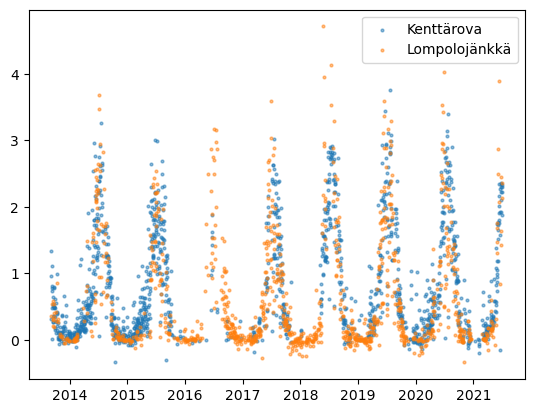

In [16]:
plt.scatter(obs.loc[obs['ET_NFOR_flag'] < 1].index, obs.loc[obs['ET_NFOR_flag'] < 1, 'ET_NFOR'], s=4, alpha=0.5, label='Kenttärova')
plt.scatter(obs.loc[obs['ET_NWET_flag'] < 1].index, obs.loc[obs['ET_NWET_flag'] < 1, 'ET_NWET'], s=4, alpha=0.5, label='Lompolojänkkä')
plt.legend()

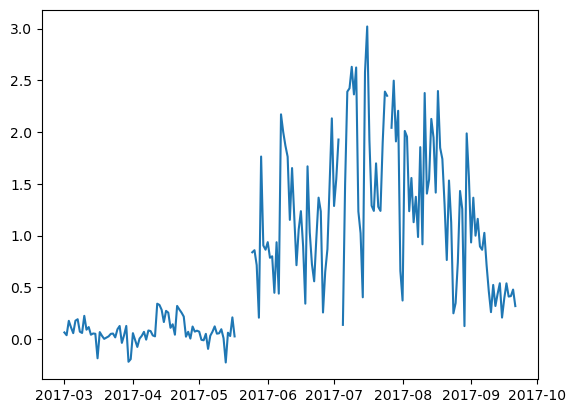

In [17]:
plt.plot(obs['ET_NFOR']['2017-01-01':'2017-10-01'])

In [18]:
obs.to_csv(r'C:\SpaFHy_v1_Pallas_2D\obs\ec_et_2024.csv',
               sep=';', index=True)

In [50]:
swe = pd.DataFrame()
swe['lompolojankka'] = obs_l['SWE_obs'].resample('D').mean()
swe.index = obs_l['SWE_obs'].resample('D').mean().index
swe['kenttarova'] = obs_k['SWE_obs'].resample('D').mean()
swe = swe.loc[swe.loc[(swe['lompolojankka'].notna()) | (swe['lompolojankka'].notna())].index[0]:]
swe.head()
swe['lompolojankka']['2019-04-25'] = np.nan
swe = swe['2018-09-01':]

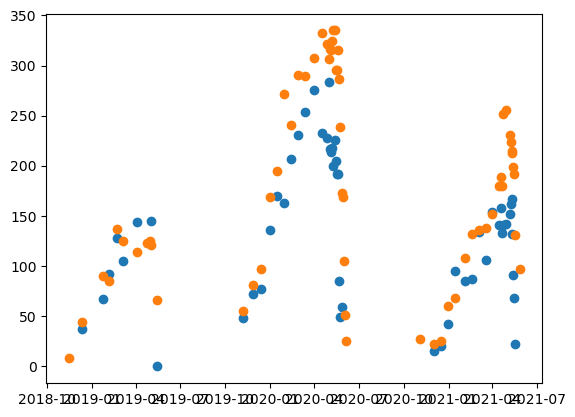

In [51]:
plt.scatter(swe.index, swe['lompolojankka'])
plt.scatter(swe.index, swe['kenttarova'])

In [52]:
swe.to_csv(r'C:\SpaFHy_v1_Pallas_2D\obs\swe_sites.csv',
               sep=';', index=True)